# Project: Time Series Analysis of NAICS

   ### questions
    1.how employment in Construction evolved over time and how this compares to the total employment across all industries?

In [1]:
#reading in LMO data 
import pandas as pd
lmo = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [2]:
#reading in data output file 
output=pd.read_excel('Data_Output_Template.xlsx')
print(output.shape)
output.head()

(15576, 4)


,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


In [3]:
output=pd.merge(output, lmo, on='LMO_Detailed_Industry', how='left')
output['DATE']=pd.to_datetime(output['SYEAR'].astype(str)+'/'+output['SMTH'].astype(str))
output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS,DATE
0,1997,1,Accommodation services,NaN,721,1997-01-01
1,1997,1,Air transportation,NaN,481,1997-01-01
2,1997,1,Ambulatory health care services,NaN,621,1997-01-01
3,1997,1,"Amusement, gambling and recreation industries",NaN,713,1997-01-01
4,1997,1,"Architectural, engineering and related services",NaN,5413,1997-01-01


In [4]:
#Past work before I noticed I was repeating myself then I created a function
#reading in and combining all 2-digit NAICS raw data files
#import glob
#naics_2_files=glob.glob('RTRA_Employ_2*.csv')
#NAICS_2=pd.concat(pd.read_csv(file) for file in naics_2_files)
#NAICS_2.head()

#splitting the industry name and NAICS into seperate columns
#NAICS_2[['LMO_Detailed_Industry','NAICS']]=NAICS_2['NAICS'].str.split('[',1, expand=True)
#NAICS_2.head()

#cleaning NAICS column
#NAICS_2['NAICS']=NAICS_2['NAICS'].str.strip(']')

#NAICS_2.head()

#reading in and combining all 3-digit NAICS raw data files
#import glob
#naics_3_files=glob.glob('RTRA_Employ_3*.csv')
#NAICS_3=pd.concat(pd.read_csv(file) for file in naics_3_files)
#NAICS_3.head()

In [5]:
# defining a function to read in and clean NAICS digit at all levels
import glob
def Raw_data_reader(n):
    """a function to read in and clean NAICS digit at levels 2 and 3"""
    files=glob.glob('RTRA_Employ_'+ str(n)+'*.csv')
    NAICS_n=pd.concat(pd.read_csv(file) for file in files)
    NAICS_n[['LMO_Detailed_Industry','NAICS']]=NAICS_n['NAICS'].str.split('[',1, expand=True)
    NAICS_n['NAICS']=NAICS_n['NAICS'].str.strip(']')  
    return NAICS_n

In [6]:
NAICS_2=Raw_data_reader(2)
NAICS_3=Raw_data_reader(3)

In [7]:
#The RTRA_Employ data for 4-digit NAICS is quite different as the NAICS column contains only the NAICS number and no industry name so I'd read it in normally
files=glob.glob('RTRA_Employ_4*.csv')
NAICS_4=pd.concat(pd.read_csv(file) for file in files)

All data has been read in now and we are ready for analysis!

We have 5 data frames, NAICS_2, NAICS_3, NAICS_4, lmo and output

In [8]:
NAICS_data=pd.concat([NAICS_2,NAICS_3,NAICS_4])
NAICS_data=NAICS_data[NAICS_data.SYEAR<=2018]
NAICS_data['DATE']=pd.to_datetime(NAICS_data['SYEAR'].astype(str)+'/'+NAICS_data['SMTH'].astype(str))

In [9]:
output.NAICS=output.NAICS.astype(str).str.replace('&',',').str.split(',')

In [10]:
output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS,DATE
0,1997,1,Accommodation services,NaN,[721],1997-01-01
1,1997,1,Air transportation,NaN,[481],1997-01-01
2,1997,1,Ambulatory health care services,NaN,[621],1997-01-01
3,1997,1,"Amusement, gambling and recreation industries",NaN,[713],1997-01-01
4,1997,1,"Architectural, engineering and related services",NaN,[5413],1997-01-01


In [12]:
complex=output[output['NAICS'].apply(len)>1]

complex=complex.explode(['NAICS'])

##### 

In [14]:
output=output[~(output['NAICS'].apply(len)>1)]

output=pd.concat([output,complex])

In [16]:
output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS,DATE
0,1997,1,Accommodation services,NaN,[721],1997-01-01
1,1997,1,Air transportation,NaN,[481],1997-01-01
2,1997,1,Ambulatory health care services,NaN,[621],1997-01-01
3,1997,1,"Amusement, gambling and recreation industries",NaN,[713],1997-01-01
4,1997,1,"Architectural, engineering and related services",NaN,[5413],1997-01-01
...,...,...,...,...,...,...
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3362,2018-12-01
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3363,2018-12-01
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3364,2018-12-01
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3365,2018-12-01


In [17]:
output.NAICS=output.NAICS.astype(str).str.strip('[]')
output.NAICS=output.NAICS.astype(str).str.strip("''")

In [18]:
output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS,DATE
0,1997,1,Accommodation services,NaN,721,1997-01-01
1,1997,1,Air transportation,NaN,481,1997-01-01
2,1997,1,Ambulatory health care services,NaN,621,1997-01-01
3,1997,1,"Amusement, gambling and recreation industries",NaN,713,1997-01-01
4,1997,1,"Architectural, engineering and related services",NaN,5413,1997-01-01
...,...,...,...,...,...,...
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3362,2018-12-01
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3363,2018-12-01
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3364,2018-12-01
15568,2018,12,Transportation equipment manufacturing (exclud...,NaN,3365,2018-12-01


In [19]:
#Merging the output table and the NAICS data on date (I could have merged it on NAICS but I want to be able to account for lower levels later on
end_result=pd.merge(output,NAICS_data, on=['DATE'],how='left')

#keeping only exact matches of NAICS number, plan to inprove it such that lower level of aggregation can be mapped into higher levels of aggregation
df=end_result[end_result['NAICS_x']==end_result['NAICS_y']]

In [22]:
#dropping redundant columns and grouping
df.reset_index().drop(['Employment','LMO_Detailed_Industry_y'],1)
df=df.groupby(['DATE','LMO_Detailed_Industry_x'])['_EMPLOYMENT_'].sum()

df=pd.DataFrame(df)
df=df.reset_index()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_2264/3111326990.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.reset_index().drop(['Employment','LMO_Detailed_Industry_y'],1)


In [43]:
import datetime as dt
df['MONTH']=df['DATE'].dt.month
df['YEAR']=df['DATE'].dt.year

In [56]:
# creating a dataframe for the total employment in all industries grouped br date
total=pd.DataFrame(df.groupby('DATE')['_EMPLOYMENT_'].sum())

### How has the construction industry changed over time?

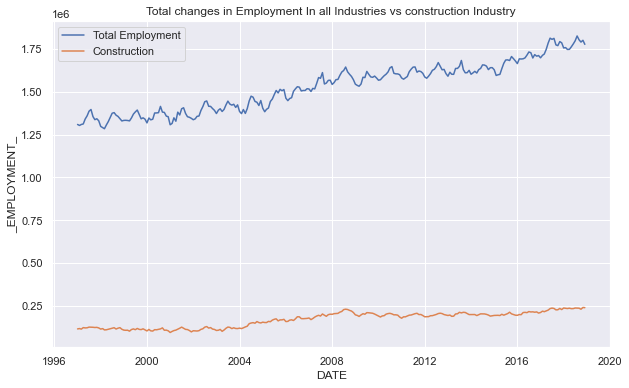

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=total, label= 'Total Employment')
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=df[df['LMO_Detailed_Industry_x']=='Construction'], label='Construction')
_=plt.title('Total changes in Employment In all Industries vs construction Industry')
_=plt.legend()
plt.show()

 There has been an upward growth in the employments in all the industries over time. Though there are variabilities mostly due to industries with seasonal changes in employments, there has been a very clear in crease in employment among industries in the NAICS.
 There has also been increase in the construction industry in particular, but that the employment increase has not been as much has what was recorded over all

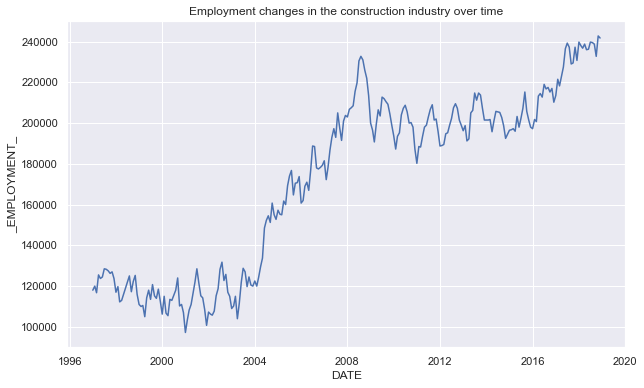

In [72]:
plt.figure(figsize=(10,6))
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=df[df['LMO_Detailed_Industry_x']=='Construction'])
_=plt.title('Employment changes in the construction industry over time')
plt.show()

The employment in the construction industry has seen huge leaps over time, example in 2005, 2009. it has also seen its fair share of downsizing but in general there has been a clear increase over the years!

### How has the Air transportation industry changed over time?

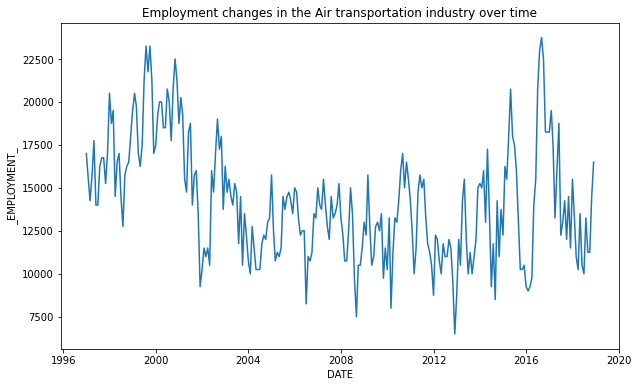

In [24]:
plt.figure(figsize=(10,6))
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=df[df['LMO_Detailed_Industry_x']=='Air transportation'])
_=plt.title('Employment changes in the Air transportation industry over time')
plt.show()

In the air transportation industry we can see no clear increase in employment. If anything there has been a downsizing from 2001-2015 approximately, but this again may be a pattern as there was a surge in 2017 and a reduction followed closely after.

### How has the Accommodation services industry changed over time?

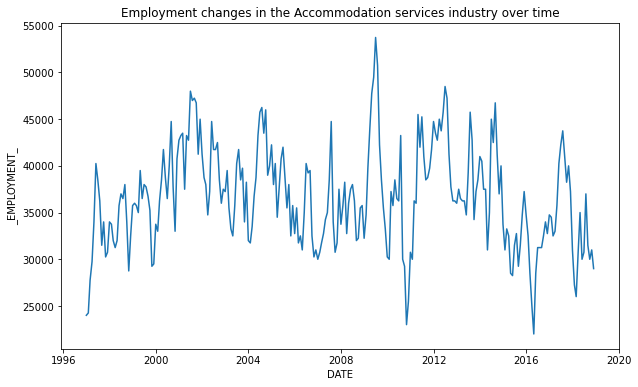

In [25]:
plt.figure(figsize=(10,6))
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=df[df['LMO_Detailed_Industry_x']=='Accommodation services'])
_=plt.title('Employment changes in the Accommodation services industry over time')
plt.show()

The accommodation services industry is a highly seasonal industry.
People go on vacation at particular times and companies like airbnb and others in the industry will have to hire more hands to accomodate the increase in demand. This variability can be seen clearly in the employment trend over time.

### How has the Transit, sightseeing, and pipeline transportation industry changed over time?

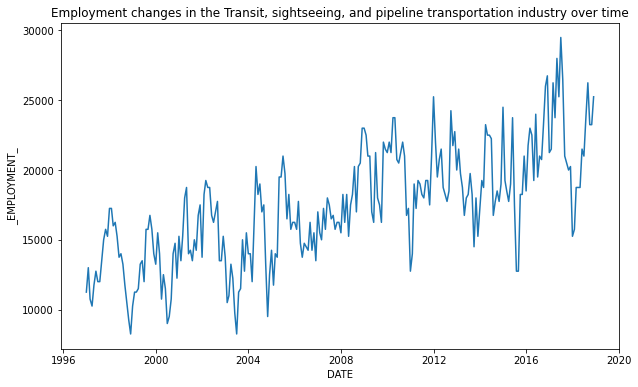

In [26]:
plt.figure(figsize=(10,6))
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=df[df['LMO_Detailed_Industry_x']=='Transit, sightseeing, and pipeline transportation'])
_=plt.title('Employment changes in the Transit, sightseeing, and pipeline transportation industry over time')
plt.show()


There is a clear increase in the employments in this group of industries and the variabilities seen would be due to the need to accumulate changes in demand.

### How has the Amusement, gambling and recreation industries changed over time?

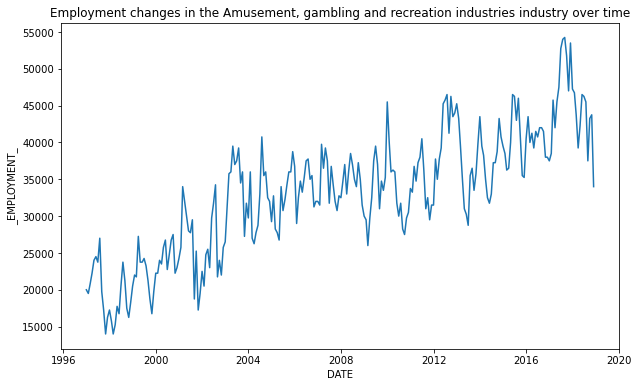

In [27]:
plt.figure(figsize=(10,6))
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=df[df['LMO_Detailed_Industry_x']=='Amusement, gambling and recreation industries'])
_=plt.title('Employment changes in the Amusement, gambling and recreation industries industry over time')
plt.show()

People are cearly been having more fun every year compared to the previous because more people or clearly being employed in the industry.

### Which industry employed the most as at 2018?

In [85]:
df[(df.YEAR==2018) & (df['_EMPLOYMENT_']==df['_EMPLOYMENT_'].max())]

,DATE,LMO_Detailed_Industry_x,_EMPLOYMENT_,MONTH,YEAR
11569,2018-11-01,Construction,242750,11,2018


The Construction industry had the most employees as of 2018

### Which industry saw the most increase in employment

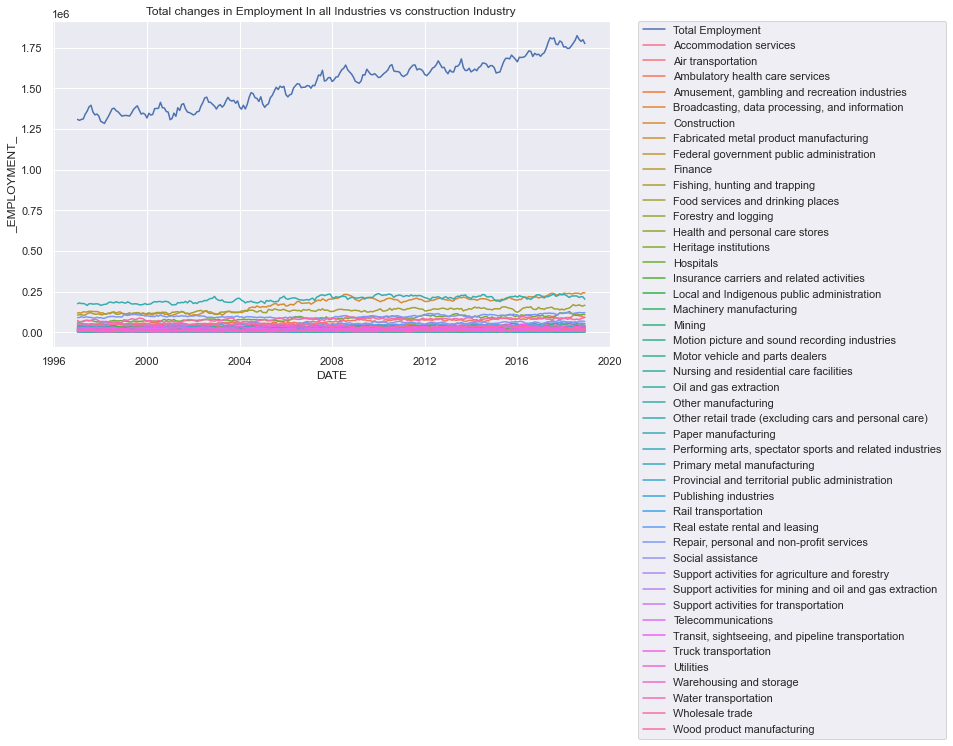

In [83]:
plt.figure(figsize=(10,6))
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=total, label= 'Total Employment')
_=sns.lineplot(x='DATE',y='_EMPLOYMENT_', data=df,hue='LMO_Detailed_Industry_x')
_=plt.title('Total changes in Employment In all Industries vs construction Industry')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)
plt.show()